# [Theoretically Principled Trade-off between Robustness and Accuracy<br />鲁棒性与准确性之间的理论原则权衡](http://arxiv.org/abs/1901.08573)

Contributions  
贡献

- Theoretically, we characterize the trade-off between accuracy and robustness for classification problems via decomposing the robust error as the sum of the natural error and the boundary error. We provide differentiable upper bounds on both terms using the theory of classification-calibrated loss, which are shown to be the tightest upper bounds uniform over all probability distributions and measurable predictors.  
从理论上讲，我们通过将鲁棒误差分解为自然误差和边界误差的和，来表征分类问题中准确性和鲁棒性之间的权衡。我们使用分类校准损失的理论提供了两种误差的可微上界，这些上界被证明是所有概率分布和可测量预测器的最紧上界。

- Algorithmically, inspired by our theoretical analysis, we propose a new formulation of adversarial defense, TRADES, as optimizing a regularized surrogate loss. The loss consists of two terms: the term of empirical risk minimization encourages the algorithm to maximize the natural accuracy, while the regularization term encourages the algorithm to push the decision boundary away from the data, so as to improve adversarial robustness.  
从算法上讲，受我们的理论分析的启发，我们提出了一种新的对抗防御形式，TRADES，作为优化正则化代理损失。该损失由两个项组成：经验风险最小化项鼓励算法最大化自然精度，而正则化项鼓励算法将决策边界推离数据，从而提高对抗鲁棒性。

- Experimentally, we show that our proposed algorithm outperforms state-of-the-art methods under both black-box and white-box threat models.   
在实验上，我们表明我们提出的算法在黑盒和白盒威胁模型下都优于最先进的方法。


## Preliminaries<br />预备知识

$\mathbb{B}(x,\epsilon)=\{ x' \in X: \Vert x'-x \Vert ≤ \epsilon \}$

The decision boundary of f:  
f的决策边界：

$$
DB(f)=\{ x \in X: f(x)=0 \}
$$

$
\mathbb{B}(DB(f),\epsilon) = \{ x \in X: \exists x' \in \mathbb{B}(x,\epsilon), \rm{s.t.} f(x)f(x') ≤0 \}
$

For a given function $ψ(u)$,  $ψ^{∗}(v) := \rm{sup}_{u} \{u^{T} v − ψ(u)\}$  
对于给定的函数$ψ(u)$，$ψ^{∗}(v) := \rm{sup}_{u} \{u^{T} v − ψ(u)\}$

$φ(·)$ indicates the surrogate of 0-1 loss.  
$φ(·)$表示0-1损失的替代函数。

Robust error:  
鲁棒误差：

$$
R_{\rm{rob}} (f) := \mathbb{E}_{(X,Y) ∼ D} \bf{1} \{ ∃X' \in \mathbb{B} (X, \epsilon) \ s.t. \  f (X')Y ≤ 0 \}
$$


Natural error:  
自然误差：

$$
R_{\rm{nat}} (f) := \mathbb{E}_{(X,Y) ∼ D} \bf{1} \{ f (X)Y ≤ 0 \}
$$

Boundary error:  
边界误差：

$$
R_{\rm{bdy}} (f) := \mathbb{E}_{(X,Y) ∼ D} \bf{1} \{ X \in \mathbb{B}(DB(f), \epsilon), f (X)Y > 0 \}
$$

$R_{rob}(f) = R_{nat}(f) + R_{bdy}(f)$

The demands of computational efficiency have led researchers to focus on minimization of a tractable surrogate loss  
计算效率的要求导致研究人员将重点放在最小化可处理的代理损失上

$$
R_{φ}(f) := \mathbb{E}_{(X,Y) ∼ D} φ(f(X)Y)
$$


We make a weak assumption on $φ$: it is **classification-calibrated**.  
我们对$φ$做出一个弱假设：它是**分类校准**的。

For $η ∈ [0, 1]$, define the conditional $φ$-risk by  
对于$η ∈ [0, 1]$，通过以下方式定义条件$φ$-风险

$$
H(\eta) := \rm{inf}_{\alpha \in \mathbb{R}} C_{\eta}(\alpha) := \rm{inf}_{\alpha \in \mathbb{R}} (ηφ(α) + (1 − η)φ(−α))
$$

$$
H^{-}(\eta) := \rm{inf}_{\alpha (2\eta-1) ≤0} C_{\eta}(\alpha)
$$

For any $η \not= 1/2, H^{−}(η) > H(η)$.  
对于任何$η \not= 1/2, H^{−}(η) > H(η)$。

$ψ : [0, 1] → [0, ∞), \quad ψ= \widetilde{ψ}^{**}, \quad \widetilde{ψ}(\theta):=H^{-}(\frac{1+\theta}{2})-H(\frac{1+\theta}{2})$

$ψ$ is non-decreasing, continuous, convex on $[0, 1]$ and $ψ(0) = 0$.  
$ψ$在$[0, 1]$上是非递减的、连续的、凸的，且$ψ(0) = 0$。


## Relating 0-1 loss to Surrogate Loss<br /> 0-1 损失与代替损失

### Upper bound<br />上界
$$
R_{rob}(f) − R^{∗}_{nat} = R_{nat}(f) − R^{∗}_{nat} + R_{bdy}(f) ≤ ψ^{−1}(R_{φ}(f) − R^{∗}_{φ}) + R_{bdy}(f)
$$

$$
R^{∗}_{φ} := \min_{f} R_{φ}(f)
$$

Nonnegative loss function $φ$, $φ(0) ≥ 1$  
非负损失函数$φ$，$φ(0) ≥ 1$

$$
R_{rob}(f) − R^{∗}_{nat} ≤ ψ^{−1}(R_{φ}(f)−R^{∗}_{φ})+\rm{Pr}[X \in \mathbb{B}(\rm{DB}(f), \epsilon), f(X)Y > 0] ≤ ψ^{−1}(R_{φ}(f)−R^{∗}_{φ}) + \mathbb{E} \max_{X' \in \mathbb{B}(X ,\epsilon)} \ φ(f (X')f (X)/λ).
$$

### Lower bound<br />下界

Nonnegative loss function $φ$,$φ(x) → 0$ as $x → +∞$

$θ ∈ [0, 1]$

A regularization parameter $λ > 0$ such that $R_{rob}(f) − R^{∗}_{nat} = θ$

$$
ψ ( θ − \mathbb{E} \max_{X' \in \mathbb{B}(X ,\epsilon)} φ(f (X')f (X)/λ) ) ≤ R_{φ}(f) − R^{∗}_{φ}≤ψ ( θ − \mathbb{E} \max_{X' \in \mathbb{B}(X ,\epsilon)} φ(f (X')f (X)/λ) ) + ξ
$$


## Algorithmic Design for Defenses<br />防御的算法设计

$$
\min_{f} \mathbb{E} \{ \underbrace{φ(f(X)Y)}_{\rm{for} \ \rm{accuracy}} + \underbrace{\max_{X' \in \mathbb{B}(X ,\epsilon)} φ(f (X')f (X)/λ)}_{\rm{regularization \ for \ robustness}} \}
$$

The tuning parameter $λ$ plays a critical role on balancing the importance of natural and robust errors.  
调节参数$λ$在平衡自然误差和鲁棒误差的重要性方面起着关键作用。

ALP simulates adversarial example $X'$ by the $\rm{FGSM}^{k}$ attack, TRADES simulates $X'$ by solving $\rm{argmax}_{X' \in \mathbb{B}(X,\epsilon)} φ(f (X)f (X')/λ)$. Moreover, while ALP uses the $l_{2}$ loss between $f (X)$ and $f (X')$ to regularize the training procedure without theoretical guarantees, TRADES uses the classification-calibrated loss.  
ALP通过$\rm{FGSM}^{k}$攻击模拟对抗样本$X'$，TRADES通过求解$\rm{argmax}_{X' \in \mathbb{B}(X,\epsilon)} φ(f (X)f (X')/λ)$来模拟$X'$。此外，虽然ALP使用$f (X)$和$f (X')$之间的$l_{2}$损失来规范训练过程，但没有理论保证，TRADES使用分类校准损失。

Algorithmically, we replace $φ$ with a multi-class calibrated loss $L(·, ·)$.  
从算法上讲，我们用多类校准损失$L(·, ·)$替换$φ$。

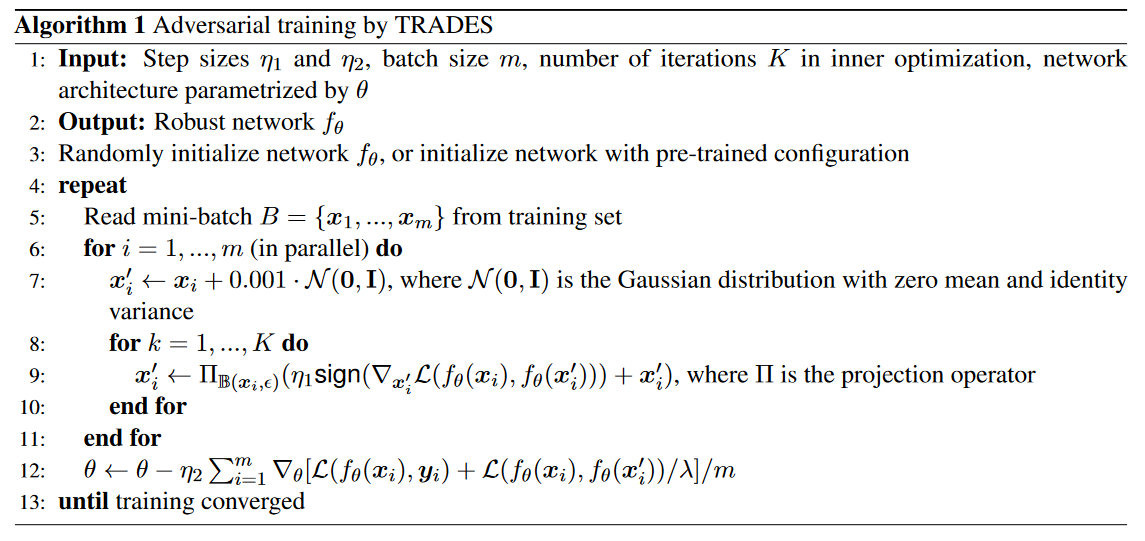